# Neuman Solution for Flow to a Well in an Unconfined Aquifer

The **Neuman solution** describes **transient flow** to a pumping well in an **unconfined aquifer**, accounting for:

- **Delayed yield** (gradual drainage from pores as the water table declines),
- **Aquifer compressibility** (elastic response),
- **Gravity drainage** effects.

It generalizes the earlier Theis solution, which neglected delayed gravity drainage and assumed immediate release of water upon drawdown.

---

## Physical Setting

- **Aquifer** is **unconfined**: the upper boundary is a free surface (the water table).
- **Pumping** starts at time $t=0$ at a **constant rate** $Q$.
- **Aquifer properties** include:
  - Hydraulic conductivity $K$
  - Specific storage $S_s$
  - Specific yield $S_y$
  - Saturated thickness $b$

---

## Governing Equations

Neuman modeled the flow using two coupled processes:

1. **Elastic storage** (immediate response due to aquifer compressibility),
2. **Delayed yield** (gravity-driven drainage from above the declining water table).

The **governing PDE** for drawdown $s(r, z, t)$ in the saturated zone is:

$$
\frac{\partial s}{\partial t} = \frac{K}{S_s} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial s}{\partial r} \right) + \frac{\partial^2 s}{\partial z^2} \right)
$$

where:
- $r$ is radial distance from the well,
- $z$ is vertical coordinate measured downward from the water table,
- $t$ is time,
- $K$ is assumed isotropic for simplicity.

---

## Boundary and Initial Conditions

### At the Well ($r = r_w$):

A **flux boundary condition** enforces the pumping rate:

$$
2\pi r_w b K \left. \frac{\partial s}{\partial r} \right|_{r=r_w} = -Q
$$

where $r_w$ is the well radius.

### Far from the Well ($r \to \infty$):

Drawdown vanishes:

$$
s(r, z, t) \to 0 \quad \text{as} \quad r \to \infty
$$

### Water Table Boundary Condition ($z = 0$):

At the water table (free surface):

$$
\left. \frac{\partial s}{\partial z} \right|_{z=0} = \frac{S_y}{S_s} \frac{\partial s}{\partial t}
$$

This models **delayed drainage**: the flux out of the saturated zone at $z = 0$ is proportional to the **rate of change** of the water table (delayed yield behavior).

### Bottom of Aquifer ($z = b$):

Assume **no flow** across the bottom boundary:

$$
\left. \frac{\partial s}{\partial z} \right|_{z=b} = 0
$$

### Initial Condition ($t = 0$):

Aquifer initially undisturbed:

$$
s(r, z, 0) = 0
$$

---

## Important Dimensionless Parameters

Neuman introduced **dimensionless variables**:

- Dimensionless time:

$$
t_D = \frac{K t}{S_s r^2}
$$

- Dimensionless radial distance:

$$
r_D = \frac{r}{r_w}
$$

- Dimensionless vertical coordinate:

$$
z_D = \frac{z}{b}
$$

- Specific yield to specific storage ratio:

$$
\beta = \frac{S_y}{S_s b}
$$

The behavior of the system depends strongly on $\beta$ — larger $\beta$ implies stronger delayed yield effects.

---

## Analytical Solution

The Laplace-transformed drawdown (in terms of dimensionless variables) involves a **series expansion** of modified Bessel functions $K_0$ and eigenfunctions satisfying the vertical boundary conditions.

In Laplace space:

$$
\tilde{s}(r, z, p) = \text{(series involving Bessel functions, exponentials, and eigenvalues)}
$$

Numerical inversion techniques (such as Stehfest's algorithm) are usually used to retrieve $s(r, z, t)$ in the time domain.

---

## Special Cases

- At **early times**, drawdown behaves like a **confined aquifer** (elastic storage dominates).
- At **late times**, **gravity drainage** dominates, and the system behaves like a classic **unconfined system** where specific yield controls the drawdown.

---

# 📋 Summary

| Feature               | Neuman Model |
|------------------------|--------------|
| Aquifer type           | Unconfined   |
| Flow types             | Radial and vertical (3D) |
| Storage mechanisms     | Elastic storage + delayed yield |
| Governing PDE          | 3D diffusion equation with leakage at water table |
| Method of solution     | Laplace transform, eigenfunction expansion |
| Important parameters   | $S_s$, $S_y$, $K$, $b$ |

---

# 🔥 Key Differences from Theis Solution

| Aspect                | Theis                 | Neuman               |
|-----------------------|------------------------|-----------------------|
| Aquifer type          | Confined               | Unconfined           |
| Storage               | Instantaneous elastic  | Elastic + delayed drainage |
| Water table effects   | Ignored                | Modeled explicitly   |
| Behavior at early times | Matches confined     | Matches confined     |
| Behavior at late times | No change             | Transition to gravity drainage |

/tmp/ipykernel_2819631/676758419.py:29: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  num = j**(N//2) * np.math.factorial(2*j)
/tmp/ipykernel_2819631/676758419.py:30: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  den = (np.math.factorial(N//2 - j) *
/tmp/ipykernel_2819631/676758419.py:31: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  np.math.factorial(j) *
/tmp/ipykernel_2819631/676758419.py:32: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  np.math.factorial(j - 1) *
/tmp/ipykernel_2819631/676758419.py:33: DeprecationWarning: `np.math` is a depre

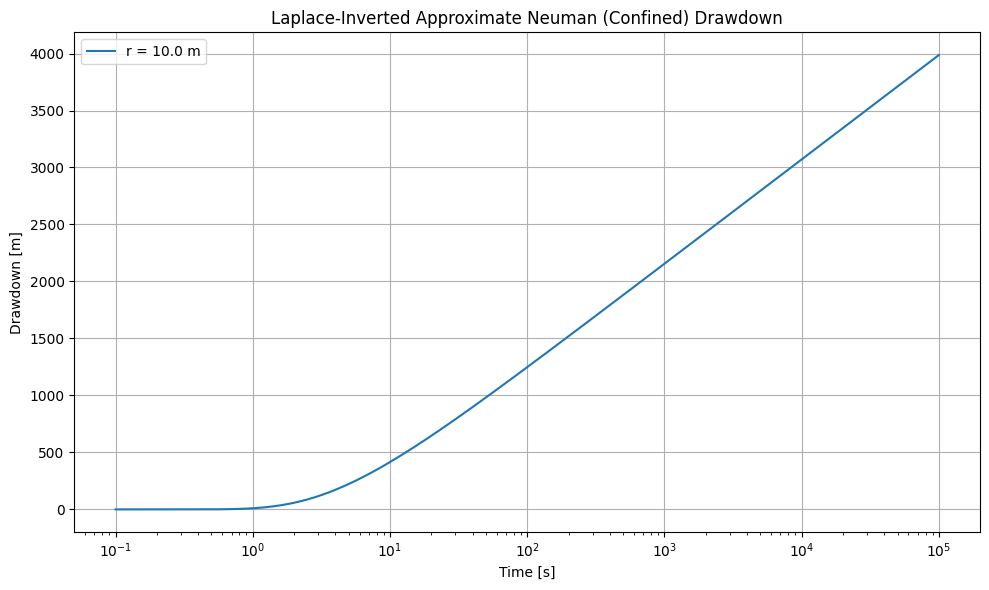

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kv  # Modified Bessel function of the second kind

# -------------------------------
# Stehfest Algorithm for Inversion
# -------------------------------

def stehfest_inversion(Lap_func, t, N=12):
    """
    Numerical inversion of Laplace transform using Stehfest algorithm.
    
    Parameters:
        Lap_func: function of p (Laplace domain)
        t: scalar or array, time values to evaluate inverse at
        N: even integer (number of terms in the Stehfest approximation)
        
    Returns:
        f_t: approximation of f(t)
    """
    if N % 2 != 0:
        raise ValueError("N must be even")

    ln2 = np.log(2)
    V = np.zeros(N)
    for k in range(1, N+1):
        s = 0
        for j in range(int((k+1)/2), min(k, N//2)+1):
            num = j**(N//2) * np.math.factorial(2*j)
            den = (np.math.factorial(N//2 - j) *
                   np.math.factorial(j) *
                   np.math.factorial(j - 1) *
                   np.math.factorial(k - j) *
                   np.math.factorial(2*j - k))
            s += num / den
        V[k-1] = s * (-1)**(k + N//2)

    t = np.atleast_1d(t)
    f_t = np.zeros_like(t)
    for i, ti in enumerate(t):
        total = 0
        for k in range(1, N+1):
            p = k * ln2 / ti
            total += V[k-1] * Lap_func(p)
        f_t[i] = ln2 / ti * total

    return f_t if len(f_t) > 1 else f_t[0]

# -------------------------------
# Laplace-domain drawdown (confined case)
# -------------------------------

def neuman_laplace_solution(p, r, T, Ss):
    """
    Simplified Laplace-domain solution for drawdown in confined aquifer (approximate Neuman).
    
    Parameters:
        p: Laplace parameter
        r: radial distance from well [m]
        T: transmissivity [m^2/s]
        Ss: specific storage [1/m]
        
    Returns:
        Laplace-space drawdown at radius r
    """
    u = r * np.sqrt(p * Ss / T)
    return kv(0, u) / p

# -------------------------------
# Parameters and Plotting
# -------------------------------

# Aquifer and pumping parameters
Q = 1.0         # Pumping rate [m^3/s]
T = 1e-4        # Transmissivity [m^2/s]
Ss = 1e-5       # Specific storage [1/m]
r = 10.0        # Distance from well [m]
t = np.logspace(-1, 5, 200)  # Time array [s]

# Define Laplace function for drawdown
Lap_func = lambda p: (Q / (4 * np.pi * T)) * neuman_laplace_solution(p, r, T, Ss)

# Perform Stehfest inversion
s = stehfest_inversion(Lap_func, t)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, s, label=f"r = {r} m")
plt.xscale("log")
plt.xlabel("Time [s]")
plt.ylabel("Drawdown [m]")
plt.title("Laplace-Inverted Approximate Neuman (Confined) Drawdown")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
